<a href="https://colab.research.google.com/github/judahwo/PyTorch_Full_Course/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03 Computer Vision**

**What is computer vision? **


Computer vision is a field of artificial intelligence that trains computers to interpret and understand the visual world. In other words, it enables computers to identify and process objects in images and videos in the same way that humans do.

Some of the general applications of computer vision include:

1. **Image Recognition:** This is probably the most common use of computer vision and it includes the identification and detection of objects or features in an image.

2. **Object Detection:** This is about finding instances of real-world objects in images or videos. This can include people, buildings, or any other objects.

3. **Object Tracking:** Once an object has been identified, computer vision algorithms can continuously track the object's movement in a video.

4. **Semantic Segmentation:** This involves dividing an image into different segments, each segment representing a different class or category of objects.

5. **3D Reconstruction:** Computer vision can also create a 3D model of any object or even a large environment.



 ## **3.0 Computer Vision Libararies**

 | PyTorch Libarary | What Does it Do? |
 |:----------|:---------|
 |**`torchvision`**|Contains datasets, model architectures and image transformations often used for computer vision problems.|
 |**`torchvision.datasets`**|Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification<br> and more. It also contains a series of base classes for making custom datasets.|
 |**`torchvision.models`**|This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.|
 |**`torchvision.transforms`**|Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.|
 |**`torch.utils.data.Dataset`**|Base dataset class for PyTorch.|
 |**`torch.utils.data.DataLoader`**|Creates a Python iteralbe over a dataset (created with torch.utils.data.Dataset).|

> **References:**<br>
* [**`torchvision`**](https://pytorch.org/vision/stable/index.html)<br>
* [**`torchvision.transforms`**](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
# Imports
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## **3.1 Getting a Dataset**

The dataset we'll be using is FashionMNIST.

> **References:**<br> 
* [**`FashionMNIST`**](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html)<br>
* [**`ToTensor`**](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html)<br>
* [**PyTorch Datasets**](https://pytorch.org/vision/main/datasets.html)

In this module we will be exploring computer vision using premade datasets for this purpose. In the next module, we will learn how to create custom datasets

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|2|**`train_data = datasets.FashionMNIST(`**|This line is initializing a `FashionMNIST` object from the `datasets` module in torchvision and assigning it to the variable `train_data`. It's fetching<br> the training data from the FashionMNIST dataset.|
|3|**`root="data",`** |This indicates the directory where the data will be stored. If the data is not present at this location, it will be downloaded.|
|4|**`train=True,`**|This flag indicates whether to fetch training data (`True`) or testing data (`False`). Here, it's set to True, which means we are fetching training data.|
|5|**`download=True`**,| If the data isn't already present at the location specified by the `root` argument, this flag will download it.|
|6|**`transform=ToTensor(),`**|This argument is meant for specifying any transformations that should be applied to the images in the dataset. `ToTensor()` is a common<br> transformation that converts the images to a PyTorch tensor.|
|7|**`target_transform=None`**|This argument is used to specify a function that is applied to the labels of the data. Here it is set to `None`, which means no transformation is applied<br> to the labels.|
|11|**`test_data = datasets.FashionMNIST(`**|This line is similar to the first one, but here the `FashionMNIST` object is assigned to the variable `test_data`. This object will contain the test data from<br> the FashionMNIST dataset.|
|12|**`root="data",`**|same as line 3|
|13|**`train=False,`**|same as line 4 except false, see line 4 description|
|14|**`download=True,`**|same as line 5|
|15|**`transform=ToTensor()`**|same as line 6|



In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# Labels
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

The label 9 corresponds to an ankel boot

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### **3.1.1 Input and Output Shapes**



In [ ]:
# Check shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image lagbel: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image lagbel: Ankle boot


### 3.1.2 Visualize Data

Image shape: torch.Size([1, 28, 28])


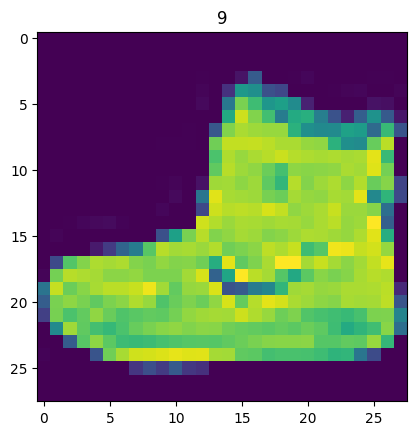

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # squeeze to eliminate extra dimension
plt.title(label);

(-0.5, 27.5, 27.5, -0.5)

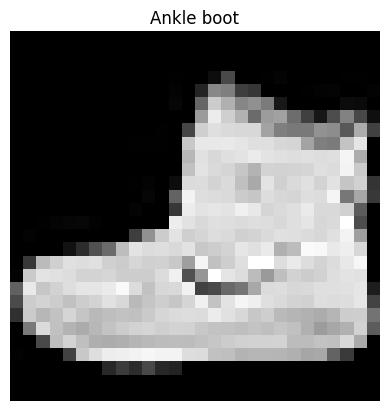

In [ ]:
# Show image in true greyscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

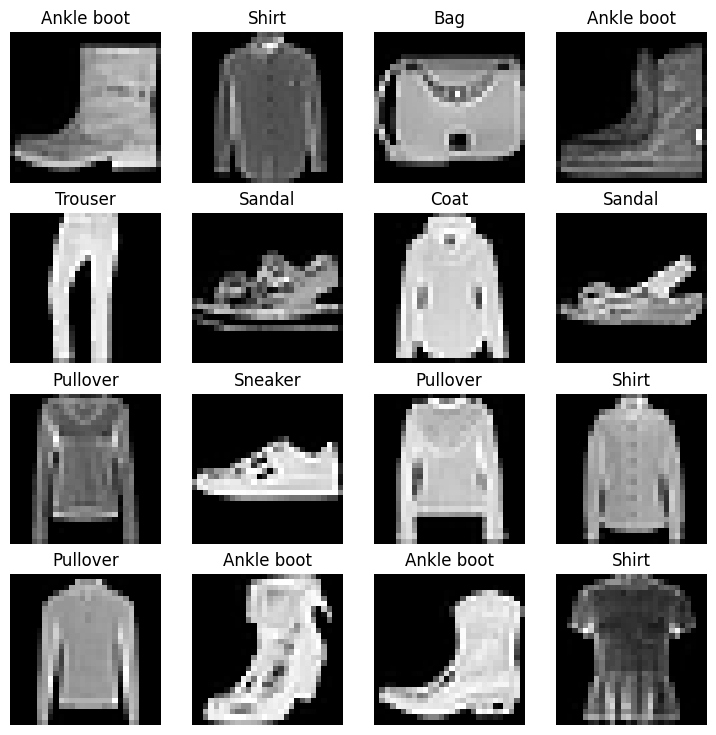

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|2|**`torch.manual_seed(42)`**|This line sets the random seed for PyTorch's random number generator to a fixed value (42 in this case). This is done<br> for reproducibility: code that uses random numbers will produce the same output every time it's run.|
|3|**`fig = plt.figure(figsize=(9, 9))`**|This line creates a new figure with matplotlib (abbreviated as `plt`), with a size of 9 by 9 inches. This figure will be used<br> to display the grid of images.|
|4|**`rows, cols = 4, 4`**|This line sets the number of rows and columns in the grid of images to 4.|
|5|**`for i in range(1, rows * cols + 1):`**| This line starts a loop that will iterate through each cell of the grid. The `range()` function generates a sequence<br> of numbers from 1 to `rows * cols + 1` (which is 17), but as Python indexing starts from 0, the last index will be 16.|
|6|**`random_idx = torch.randint(0, len(train_data), size=[1]).item()`**|This line generates a random integer between 0 and the length of `train_data`. This integer will be used as an index<br> to select a random image from the dataset. The `item()` method is used to get a Python number from a tensor.|
|7|**`img, label = train_data[random_idx]`**|This line uses the random index to fetch the corresponding image and label from `train_data`.|
|8|**`fig.add_subplot(rows, cols, i)`**| This line adds a subplot to the figure at the `i`th position in the grid. The grid is defined by `rows` and `cols`.|
|9|**`plt.imshow(img.squeeze(), cmap="gray")`**|This line displays the image in the current subplot. The `squeeze()` method is used to remove any unnecessary<br> dimensions from the image tensor  The `cmap="gray"` argument sets the colormap to grayscale.|
|10|**`plt.title(class_names[label])`**|This line sets the title of the current subplot to the class name corresponding to the label of the image.|
|11|**`plt.axis(False)`**|This line hides the x and y axis in the current subplot.|

## **3.2 Prepare DataLoader**


In PyTorch, a DataLoader is a utility that helps you manage datasets. It provides the ability to batch, shuffle and load data in parallel using multiprocessing.

Here's why we would use a DataLoader:

1. **Batch Processing**: A DataLoader enables automatic batching of data. When dealing with large datasets that cannot fit into memory, we need a way to feed the data to the model in smaller chunks (batches). DataLoader helps automate this process.

2. **Data Shuffling**: DataLoader also has built-in functionality to shuffle the data, which is essential for training machine learning models effectively. Shuffling the data ensures that the model gets a mix of examples from the dataset, so it does not learn the order of the training data, which can lead to overfitting.

3. **Parallel Loading**: DataLoader enables parallel loading of data onto the GPU (if available), utilizing multiprocessing. This is beneficial as it can significantly speed up the data loading step, which could otherwise be a bottleneck in the training process.

4. **Custom Data Loading**: By implementing a custom subclass of torch.utils.data.Dataset, you can also have complex logic to load data, such as asynchronous computation for loading data, or loading data in a specific format.

Overall, the use of DataLoader facilitates cleaner and more efficient code for managing and loading datasets in PyTorch. It takes care of a lot of the lower level details, allowing the user to focus on the main task at hand: creating and training a machine learning model.

> **References:**
* [**`torch.utils.data`**](https://pytorch.org/docs/stable/data.html)<br>
* [**Torch Datasets and Dataloaders**](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)<br>






In [ ]:
from torch.utils.data import DataLoader

# Set batch size
BATCH_SIZE = 32

# Turn datasets into interables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fea8c9a08e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fea8cb69870>)

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|1|**`from torch.utils.data import DataLoader`**|This line imports the `DataLoader` class from the `torch.utils.data` module. `DataLoader` is a utility class in PyTorch that helps<br> load datasets more conveniently.|
|4|**`BATCH_SIZE = 32`**|This line sets a constant `BATCH_SIZE` with a value of 32. This will be used as the batch size for the DataLoader, determining how many<br> samples per batch to load.|
|7-9|**`train_dataloader = DataLoader(dataset=train_data,`**<br> **`batch_size=BATCH_SIZE,`**<br> **`shuffle=True)`**|This line creates a `DataLoader` object from the `train_data` dataset with the batch size set to `BATCH_SIZE` (32). The `shuffle=True`<br> argument indicates that the data will be shuffled at every epoch before it is split into batches. This `DataLoader` object will yield<br> batches of training data.|
|11-13|**`test_dataloader = DataLoader(dataset=test_data,`**<br> **`batch_size=BATCH_SIZE,`**<br> **`shuffle=False)`**|Similar to the previous line, but this line creates a `DataLoader` object for the test data. The `shuffle=False` argument indicates that the<br> data will not be shuffled before being split into batches. This `DataLoader` will yield batches of test data.|
|15|**`train_dataloader, test_dataloader`**|This line just outputs the `train_dataloader` and `test_dataloader` objects.|


In [ ]:
# View the batches
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fea8c9a08e0>, <torch.utils.data.dataloader.DataLoader object at 0x7fea8cb69870>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Dataloader internals
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


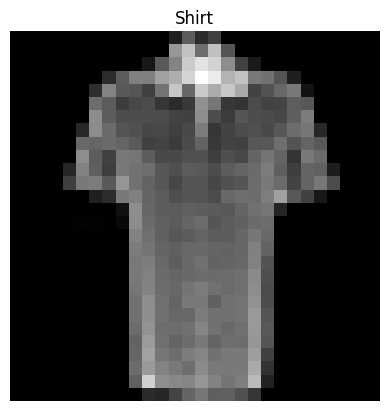

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|2|torch.manual_seed(42)|This line sets the seed for generating random numbers to 42. It ensures that you get the same results every time<br> you run this code.|
|3|random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()|This line generates a random index between 0 and the length of the `train_features_batch` tensor. This index is<br> used to select a random image from the batch. The `item()` function is used to get a Python number from a tensor.|
|4|img, label = train_features_batch[random_idx], train_labels_batch[random_idx]|This line uses the random index to select an image and its corresponding label from the batch.|
|5|plt.imshow(img.squeeze(), cmap="gray")|This line uses matplotlib's `imshow` function to display the selected image. The `squeeze()` function is used to<br> remove any singleton dimensions. If the image has dimensions (1, H, W), after `squeeze()` it will just be (H, W).<br> The colormap is set to grayscale.|
|6|plt.title(class_names[label])| This line sets the title of the image plot to the class name of the image. `class_names` is assumed to be a list or<br> array where the index corresponds to the class name.|
|7|plt.axis(False)|This line hides the axes of the plot.|
|8|print(f"Image size: {img.shape}")| This line prints the shape of the image tensor, which represents its size.|
|9|print(f"Label: {label}, label size: {label.shape}")|This line prints the label of the image and the shape of the label tensor. For classification problems, the label would<br> typically be a scalar, so its shape would be empty.|

> `train_features_batch` and `train_labels_batch` represent a batch of images and their corresponding labels from the training dataset, and `class_names` is a list or array of class labels.

## **3.3 Model 0: Baseline Model**

When building a series of machine learning models, it's best practice to stqart with a **baseline model**.

A **baseline model** in the context of machine learning is a relatively simple, initial model that you train on your data. The performance of this model serves as a comparison point or a "baseline" for all future models that you build.

Start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|2|**`flatten_model = nn.Flatten()`**| This line initializes an instance of the `nn.Flatten()` class from PyTorch's `torch.nn` module, which flattens a tensor by collapsing all of the dimensions except<br> for one into a single dimension. The resulting instance `flatten_model` acts as a model, which means it can accept input data and perform a forward pass.|
|5|**`x = train_features_batch[0]`**| This line selects the first sample from the batch `train_features_batch` and assigns it to the variable `x`. This assumes `train_features_batch` contains a batch<br> of image data where the first dimension indexes the individual samples in the batch.|
|8|**`output = flatten_model(x)`**|This line uses the flatten_model to perform a forward pass on the sample x, effectively flattening the image. The resulting tensor output is a one-dimensional<br> tensor.|


**Review of Layers:**

In the context of neural networks and deep learning, a "layer" refers to a collection of neurons that process a portion of the network's input.

Here are the main types of layers in a neural network:

1. **Input Layer**: The input layer is where the network receives input from your dataset. It is typically a passive layer, meaning the neurons do not modify the data. They just pass it to the next layer.

2. **Hidden Layers**: Hidden layers are layers between the input and output layers. In a deep neural network, there are multiple hidden layers. Each hidden layer is typically fully connected to the preceding and subsequent layers. These layers apply transformations to the inputs received from the previous layers, performing the bulk of the computation required by the model.

3. **Output Layer**: The output layer produces the final predictions of the network. It's usually fully connected to the last hidden layer. The neurons in this layer often apply a function (such as softmax) to ensure that the outputs are in a suitable format for the problem at hand (e.g., probabilities summing to 1 for a classification problem).

Each layer in a neural network usually involves two primary components:

1. **Linear Transformation**: This is the weighted sum of inputs, using the weights and biases of connections coming into the neurons in the layer.

2. **Activation Function**: This function is applied to the result of the linear transformation, allowing for non-linearity in the model. Examples of activation functions include ReLU, sigmoid, and tanh.

Complex neural networks might include additional types of layers like convolutional layers (used for image processing in Convolutional Neural Networks, CNNs).

Next, we will construct **Model_0**, our **baseline model**. It will contain two `nn.Linear()` layers and one `nn.Flatten()` (input) layer. 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|1|**`from torch import nn`**|This line *imports* PyTorch's neural network module `nn`. This module contains various classes and functions<br> that are used for building neural networks.|
|2|**`class FashionMNISTModelV0(nn.Module):`**| This line defines a new class `FashionMNISTModelV0` that inherits from the `nn.Module` base class. In<br> PyTorch, all neural network modules should also subclass this class.|
|3|**`def __init__(self, input_shape: int, hidden_units: int, output_shape: int):`**|This line defines the initializer function for the class. This function is called when an object of the class is<br> created. The initializer takes three arguments: the number of input features (`input_shape`), the number of<br> hidden units (`hidden_units`), and the number of output features (`output_shape`).|
|4|**`super().__init__()`**|This line calls the initializer of the base class `nn.Module`. This is necessary to correctly set up the internals<br> of the class.|
|5|**`self.layer_stack = nn.Sequential(...`**|This line creates an attribute `layer_stack` that represents the sequence of layers in the neural network. The<br> `nn.Sequential` class is a container for modules that should be added to the network in the order they are<br> passed in.|
|6|**`nn.Flatten()`**|This is the first layer of the network, which will flatten each input image into a 1D tensor.|
|7|**`nn.Linear(in_features=input_shape, out_features=hidden_units)`**|This is the second layer of the network, a fully-connected (or linear) layer with `input_shape` inputs and<br> `hidden_units` outputs.|
|8|**`nn.Linear(in_features=hidden_units, out_features=output_shape)`**|This is the third and final layer of the network, another fully-connected layer with `hidden_units` inputs and<br> `output_shape` outputs.|
|11|**`def forward(self, x):`**|This function defines the forward pass of the network. In PyTorch, you have to define a forward method<br> in your custom module that takes an input tensor and produces the output tensor.|
|12|**`return self.layer_stack(x)`**|This line passes the input x through the layer_stack attribute (which represents the sequence of layers)<br> and returns the output.|

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28 by 28
    hidden_units=10, # units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|4|**`model_0 = FashionMNISTModelV0(`**|This line initializes a new instance of the `FashionMNISTModelV0` class, which represents a neural network model. The instance is assigned to the variable<br> `model_0`.|
|5|**`input_shape=784,`**|This sets the number of input units for the model. The FashionMNIST images are 28x28 pixels, so they are flattened into 1D vectors of length 784.|
|6|**`hidden_units=10,`**|his sets the number of units in the hidden layer of the model to 10.|
|7|**`output_shape=len(class_names)`**|This sets the number of output units for the model. There should be one output unit for each class in the data. The number of classes is determined by the<br> length of the `class_names` list.|
|8|**`).to("cpu")`**|This assings the model to the cpu|

> Note: Here we must pay close attention to tensor size/shape. On the most common errors that we face at this stage of the model is the tensor shape mismatch. 

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

### 3.3.1 **Loss Function, Optimizer, and Evaluation Metrics**

* Loss Function: working with multi-class data we choose the loss function to be `nn.CrossEntropyLoss()`
* Optimizer: `torch.optim.SGD` (stochastic gradient descent)
* Evaluation metric: since this is a classification problem, accuracy is chosen as the evaluation metric.

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


First, we download the helper functions established in the previous module. This gives access to the predefined accuracy function (`accuracy_fn`). See Module 02 for code explaination for this block. 

In [ ]:
# Import accuracy_fn
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

These lines have all been explained previously. We are just setting up `nn.CrossEntropyLoss()` as our **loss function**, `torch.optim.SGD` as our **optimizer**, and `accuracy_fn` as our **evaluation metric**. 

### **3.3.2 Timing Fucntion**

Here we create a timing function in order to test the differnece between running the model on the CPU vs the GPU. The timing function will import the [**`timeit.default_timer()`**](https://docs.python.org/3/library/timeit.html#timeit.default_timer) **function** from the Python [**`timeit`**](https://docs.python.org/3/library/timeit.html) **module**.

The following code defines a Python function `print_train_time()` that calculates the difference between two timepoints, marking the start and end of a model training process, and prints the resulting training duration.

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation. 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|1|**`from timeit import default_timer as timer`**|The `timeit` module provides a simple way to time small bits of Python code. Here, `default_timer` is<br> imported with the name timer for use in the code.|
|2|**`def print_train_time(start: float, end: float, device: torch.device = None):`**|This defines a function `print_train_time` which takes three arguments: two floats `start` and `end`,<br> representing start and end timepoints, and `device` (defaulting to `None`), which is intended to represent<br> the device on which the training was performed |
|13|**`total_time = end - start`**|This line computes the difference between the end and start times to get the total time taken.|
|14|**`print(f"Train time on {device}: {total_time:.3f} seconds"):`**|print statement|
|15|**`return total_time`**|function returns total time|

In [ ]:
# example of how timing function works
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


6.0581998695852235e-05

### **3.3.3 Training Loop**

And traing the model on 'batches' of data. Since we are now using batches this will be slightly different from previous training loops. The steps are: 

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print statement.
5. Time it all (for fun).

For the progress bar we will use tqdm

> **References:**
* [tqdm Github](https://github.com/tqdm/tqdm)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set random seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (small for faster training time)
epochs = 3

# Training and Test Loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1 Forward Pass
    y_pred = model_0(X)

    # 2 Calculate Loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss of each batch

    # 3 Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:  # print every 400 batches
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy 
  test_loss, test_acc = 0, 0 
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1 Forward Pass
      test_pred = model_0(X_test)

      # 2 Calculate Loss (cummulative)
      test_loss += loss_fn(test_pred, y_test)

      # 3 Calculate Accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate test loss avg per batch
    test_loss /= len(test_dataloader) 

    # Calculate tess acc avg per batch
    test_acc /= len(test_dataloader)

  # Print Statement
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 39.647 seconds


> Since, most of the lines in the training loop have been explained previously, we will only examine and explain the critical lines, those which are new or different.

**Code Explaination:**

| Line | Example Code | Explaination |
|:---|:---|:---|
|5|**`for epoch in tqdm(range(epochs)):`** | The standard training loop except the `tqdm()` function is used to display a progress bar.|
|17|**`for batch, (X,y) in enumerate(train_dataloader)`**:|The `enumerate()` function is used to create an enumerated object from `train_dataloader`. `train_dataloader` is an iterable that loads<br> the training data in batches. `batch` is the count of the current batch. `(X, y)` is a tuple representing the features (`X`) and labels (`y`) of<br> the data samples in the current batch. `X` will contain the features for each sample in the batch, and `y` will contain the corresponding<br> labels. |
|24|**`train_loss += loss`**|Accumulating the training loss for each batch|
|40|**`train_loss /= len(train_dataloader)`**|Calculating the average training loss per batch.|

> Note: `test_loss` and `test_acc` are calculated cummulatively similar to `train_loss`. `test_dataloader` is used to derive the average training loss and accuracy per batch. 



## **3.4 Make Predictions and get Model_0 Results**

Now that we have completed model_0 we will continue on to build never versions of the model in order to improve it. To make this process easier we write an evaluation function in order to eliminate rewriting the same code in each new model. 

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model -> (torch.nn.Module):  A PyTorch Module that represents the machine learning model to be evaluated.
        data_loader -> (torch.utils.data.DataLoader): A PyTorch DataLoader object that represents the dataset on 
        which the model is to be evaluated.
        loss_fn -> (torch.nn.Module): A PyTorch Module that is a loss function. The loss function calculates how
        far the model's predictions are from the true values.
        accuracy_fn: A function to calculate accuracy. This is not a built-in PyTorch function but would be a 
        user-defined function that calculates accuracy given model predictions and true values.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))
      
    # Scale loss and acc to find average per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

**Code Explaination (critical/ new lines):**

| Line | Example Code | Explaination |
|:---|:---|:---|
|2 - 5|**`def eval_model(model: torch.nn.Module,`**<br> **`data_loader: torch.utils.data.DataLoader,`**<br> **`loss_fn: torch.nn.Module,`**<br> **`accuracy_fn):`**|This line defines the function `eval_model` with four parameters: the model to evaluate, the DataLoader containing the data on which to evaluate<br> the model, the loss function, and the function to calculate accuracy.|
|36 - 38|**`return {"model_name": model.__class__.__name__,`**<br> **`"model_loss": loss.item(),`**<br> **`"model_acc": acc}`**|This line creates a dictionary containing the model name, average loss, and average accuracy, and returns it.|
|41 - 44|**`return {"model_name": model.__class__.__name__,`**<br> **`"model_loss": loss.item(),`**<br> **`"model_acc": acc}`**|This line of code returns a dictionary containing the name of the model, the average loss of the model on the data, and the average<br> accuracy of the model on the data.|


We can use this dictionary to compare the baseline model results to other models later on.

## **3.5 Device Agnostic-Code**



In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Mon Jun  5 17:43:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   1129MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

## **3.6 Model 1: Non-Linear Model**

Next, we build a new model (Model_1) to try and improve on the base model. The new model will be built with non-linearity. We learned non-linearity in module 02. 

> **Review References:**<br>
 [Non-linearity](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity)<br>
 [**`nn.Sequential`**](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)<br>
 [**`nn.Flatten`**](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)<br>
 [**`nn.Linear`**](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)<br>
 [**`nn.ReLU`**](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)



In [ ]:
import torch
import torch.nn as nn

# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        """
        Constructs the FashionMNISTModelV1 class.

        Args:
            input_shape (int): The shape of the input tensor.
            hidden_units (int): The number of units in the hidden layer.
            output_shape (int): The shape of the output tensor.
        """
        super().__init__()

        # Define the layer stack
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Performs a forward pass of the model.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        """
        return self.layer_stack(x)



**`FashionMNISTModelV1`**, is a simple artificial neural network defined using PyTorch. Here's a summary of the model's architecture and functionalities:

**Input Layer**: The model expects a flat input tensor. It is designed for the `FashionMNIST` dataset, which consists of 28x28 grayscale images. The input to the network is a flattened version of these images, i.e., a tensor of shape (batch_size, 784) where 784 is 28x28.

**Hidden Layer**: After the input, there is a linear (fully connected) layer with a specified number of hidden units. This layer learns to transform the input into a higher level representation. The number of hidden units can be set when creating an instance of the model. After this layer, there is a ReLU (Rectified Linear Unit) activation function that introduces non-linearity, allowing the model to learn complex patterns.

**Output Layer**: Finally, there is another linear layer that transforms the hidden layer's outputs into the final output shape, which is equal to the number of classes in the classification problem. 

**Forward Pass**: The forward method defines how the model processes the input data and generates the output. It simply passes the input data through the layer stack sequentially as defined.

The model's simplicity makes it quick to train, but it might not have enough capacity to learn complex patterns or nuanced features in more complex datasets. Adjustments or additions to the model, such as more layers or different types of layers, could help it better learn from such datasets.

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device                              

device(type='cuda', index=0)

### **3.6.1 Loss, Optimizer, Evaluation**

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### **3.6.2 Fucntionizing Training and Test Loops**

> Let's create a function for:
* **training loop**: **`train_step()`**
* **testing loop**: **`test_step()`**

We have written similar training and test loops several times at this point. It is now time to develop functions for these loops, so we don't have to keep writing the same code. **Functionizing** can provide several key benefits:

**Code organization and reusability**: By encapsulating the training and test logic in separate functions, you can improve code organization and make it more modular. Functions allow you to break down the code into smaller, manageable units, making it easier to understand, maintain, and reuse. You can call these functions multiple times with different inputs, making your code more flexible.

**Readability and clarity**: Functionizing can improve the readability and clarity of your code. By giving meaningful names to the functions, you make your code more self-explanatory, making it easier for others (and yourself) to understand the purpose and flow of the code.

**Code reuse and extensibility**: Functions allow you to reuse code in different parts of your program or in different projects. If you have common training or testing procedures, you can define them as functions and reuse them across multiple models or datasets. Additionally, if you need to modify or extend the behavior of your training or testing logic, you can do so by modifying the respective functions, without affecting other parts of the code.

**Abstraction and encapsulation**: Functionizing allows you to abstract away the implementation details and focus on the higher-level logic of your program. By encapsulating the specific training or testing steps in functions, you can hide the complexity of the underlying operations, making your code more concise and easier to understand.

**Testing and debugging**: When you have separate functions for training and testing, it becomes easier to test and debug your code. By isolating different parts of your code in functions, you can also debug them independently, which can make the debugging process more manageable and efficient.

Overall, functionizing promotes code organization, reusability, readability, and maintainability. It helps in isolating and abstracting the core functionality, making your code more modular and easier to work with.

> **Training Loop Fuction:** **`train_step`**

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
    Performs a single training step with the model using the provided data_loader.

    Args:
        model (torch.nn.Module): The model to be trained.
        data_loader (torch.utils.data.DataLoader): The data loader containing the training data.
        loss_fn (torch.nn.Module): The loss function used to calculate the loss.
        optimizer (torch.optim.Optimizer): The optimizer responsible for updating model parameters.
        accuracy_fn: The function used to calculate the accuracy.
        device (torch.device, optional): The device to run the training on. Defaults to the 'device' variable.

    Returns:
        None
    """
  train_loss, train_acc = 0, 0
  
  # Set the model to training mode
  model.train()
  
  # Training Loop
  for batch, (X, y) in enumerate(data_loader):
    # Move data to the target device
    X, y = X.to(device), y.to(device)

    # 1 Forward Pass
    y_pred = model(X)

    # 2 Calculate Loss and Accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss of each batch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3 Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

> **Testing Loop Fucntion:** **`test_step`**

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Performs the evaluation of the model on the provided data_loader.

    Args:
        model (torch.nn.Module): The model to be evaluated.
        data_loader (torch.utils.data.DataLoader): The data loader containing the test data.
        loss_fn (torch.nn.Module): The loss function used to calculate the loss.
        accuracy_fn: The function used to calculate the accuracy.
        device (torch.device, optional): The device to run the evaluation on. Defaults to the 'device' variable.

    Returns:
        None
    """
    test_loss, test_acc = 0, 0

    # Set the model to evaluation mode
    model.eval()

    # Inference Loop
    with torch.inference_mode():
      for X, y in data_loader:
        # Move data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        test_pred = model(X)
            
        # 2. Calculate Loss and Accuracy
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
      
      # Divide the total test loss and acc by the length of the test dataloader
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Next, we write an optimization loop to test training time on GPU vs the previous time on CPU.

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train Loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train Loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 36.108 seconds


> **Note:** Sometimes, depending on data/hardware the model trains faster on the CPU than GPU. 
>
> Why?
>
> 1. It Could be overhead from copying data/model to and from the GPU outweighs the compute benefits of the GPU
> 2. The hardware you're using has better compute capability with the CPU. (rarer)

[GPU brrrr article](https://horace.io/brrr_intro.html)

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

39.646692247999454

We need to alter the eval_model to make it device agnostic. Ohterwise we will get a device mismatch runtime error. So, we copy the previous eval_model function and make a small change. 

> **Revised Model Evaluation Function:** **`eval_model()`**

To make the function device agnostic

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device: torch.device = device):
    """
    Evaluates the model's performance on a provided dataset.
    
    This function is device-agnostic and supports evaluation on different hardware (CPU/GPU).

    Args:
        model (torch.nn.Module): The PyTorch model to be evaluated.
        data_loader (torch.utils.data.DataLoader): DataLoader object that loads the dataset to be evaluated.
        loss_fn (torch.nn.Module): The loss function used to compute the difference between predicted and true values.
        accuracy_fn: Function to compute the accuracy of the model's predictions.
        device (torch.device, optional): Device (CPU, GPU, etc.) on which the computations will be performed. 
            Defaults to the device specified outside of the function if not explicitly provided.

    Returns:
        dict: A dictionary containing the model's name, average loss, and average accuracy on the evaluated dataset.
    """
    # Initialize loss and accuracy to 0
    loss, acc = 0, 0

    # Move model to the specified device
    model = model.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Enable inference mode for efficiency
    with torch.inference_mode():
      for X, y in data_loader:
        # Move data to the same device as the model
        X, y = X.to(device), y.to(device)

        # Make predictions using the model
        y_pred = model(X)

        # Compute and accumulate the loss and accuracy for each batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
      
      # Calculate the average loss and accuracy per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    # Return a dictionary containing the model's name, average loss, and average accuracy
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}



In [ ]:
# Calculate model 1 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## **3.7 Model 2: Convolutional Neural Network**


**Convolutional Neural Networks** (CNNs) are a class of deep learning models that are primarily used for image processing tasks, although they can be used for other types of input as well.

CNNs are specifically designed to process data with a grid-like topology. For instance, an image, which can be thought of as a grid of pixels. They make use of the spatial structure of the data, recognizing local patterns within the image, regardless of their position in the image.

Here is a basic overview of the architecture and operation of a CNN:

1. **Convolutional layers:** These layers apply a set of filters to the input. Each filter is convolved across the width and height of the input volume, computing the dot product between the weights of the filter and the input, and producing a 2-dimensional activation map. Stacking these maps for various filters forms the output volume of the convolutional layer. The filters are learned during the training process, allowing the network to automatically learn to recognize complex patterns.

2. **ReLU (Rectified Linear Unit) layers:** ReLU is a simple non-linear activation function, which replaces all negative pixel values in the feature map with zero. It introduces non-linearity to the network without affecting the receptive fields of the convolution layer.

3. **Pooling or subsampling layers:** These layers systematically reduce the spatial dimensions (width and height) of the input volume, to decrease the amount of parameters and computation in the network, and hence to also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially.

4. **Fully connected layers:** After several convolutional and pooling layers, the final output is flattened into a vector and fed into one or more fully connected layers. The last fully connected layer often has a softmax activation function, used for classification tasks.

5. Backpropagation and optimization: The network is trained by optimizing the weights to minimize a loss function using an optimization algorithm like stochastic gradient descent. The gradients are backpropagated through the network using the chain rule of differentiation.

One of the main advantages of CNNs is that they are less prone to overfitting due to their ability to generalize well to unseen data, making them ideal for image classification, object detection, and similar tasks in computer vision.

**References:**<br>
[**CNN Explainer**](https://poloclub.github.io/cnn-explainer/)<br>
[**CNN GitHub**](https://github.com/poloclub/cnn-explainer)<br>
[**IBM CNN Article**](https://www.ibm.com/topics/convolutional-neural-networks)<br>
[**`nn.Conv2d()`**](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)<br>
[**`nn.MaxPool2d()`**](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)<br>



> **Convolutional Neural Network Model:** **`FashionMNISTModelV2`**

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """A convolutional neural network model designed for the FashionMNIST dataset.

  The model consists of two convolutional blocks, each with two Conv2d layers
  followed by a ReLU activation function and a MaxPool2d layer for downsampling.
  The convolutional blocks are followed by a fully connected layer for classification.

  Args:
      input_shape (int): The number of input channels (1 for grayscale images, 3 for RGB images).
      hidden_units (int): The number of output channels in the Conv2d layers.
      output_shape (int): The number of output neurons in the final fully connected layer (equal to the number of classes).
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # First convolutional block
    self.conv_block_1 = nn.Sequential(
        # First convolutional layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        # ReLU activation function
        nn.ReLU(),
        # Second convolutional layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,),
        # ReLU activation function
        nn.ReLU(),
        # Max pooling for downsampling
        nn.MaxPool2d(kernel_size=2,
                     stride=2)          
    )
    # Second convolutional block
    self.conv_block_2 = nn.Sequential(
        # First convolutional layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        # ReLU activation function
        nn.ReLU(),
        # Second convolutional layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        # ReLU activation function
        nn.ReLU(),
        # Max pooling for downsampling
        nn.MaxPool2d(kernel_size=2)                    
    )
    # Classifier - fully connected layer
    self.classifier = nn.Sequential(
        # Flatten the tensor for the fully connected layer
        nn.Flatten(),
        # Fully connected layer
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    """The forward pass of the model.

    Args:
        x (torch.Tensor): The input tensor.

    Returns:
        The output of the model.
    """
    # Pass input through first convolutional block
    x = self.conv_block_1(x)
    # print(f"Output Shape of conv_block_1: {x.shape}")
    # Pass input through second convolutional block
    x = self.conv_block_2(x)
    # print(f"Output Shape of conv_block_2: {x.shape}")
    # Pass input through fully connected layer
    x = self.classifier(x)
    # print(f"Output Shape of classifier: {x.shape}")
    return(x) 

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

This is the biggest model yet! 

### **3.7.1 Stepping through `nn.Conv2d()`**

**Reference:**<br>
[**`nn.Conv2d`**](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)<br>


In [ ]:
torch.manual_seed(42)

# Generate a batch of 32 random images with shape (32, 3, 64, 64)
images = torch.randn(size=(32, 3, 64, 64))
# Select the first image from the batch
test_image = images[0]

print(f"Image Batch Shape: {images.shape}")
print(f"Single Image Shape: {test_image.shape}")
print(f"Test Image:\n {test_image.shape}")

Image Batch Shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Test Image:
 torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)

# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### **3.7.2 Stepping through `nn.MaxPool2d()`**

**Reference:**<br>
[**`nn.MaxPool2d`**](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)<br>

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### **3.7.3  Loss Function and Optimizer `model_2`**

> Note: No change here

In [ ]:
# Setup loss/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### **3.7.4 Training and Testing `model_2`**

Now we have functions for training and testing loops!!!

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2, 
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
    )
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.59317 | Train acc: 78.43%
Test loss: 0.39998 | Test accuracy: 85.65%

Epoch: 1
---------
Train Loss: 0.36148 | Train acc: 86.92%
Test loss: 0.35131 | Test accuracy: 87.13%

Epoch: 2
---------
Train Loss: 0.32334 | Train acc: 88.25%
Test loss: 0.31621 | Test accuracy: 88.38%

Train time on cuda: 41.484 seconds


In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31621086597442627,
 'model_acc': 88.37859424920129}

## **3.8 Compare Model Results and Training Time**

> Compare Results

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.316211,88.378594


> Compare Training Times

In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
                                    
compare_results                                    

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,39.646692
1,FashionMNISTModelV1,0.685001,75.019968,36.107550
2,FashionMNISTModelV2,0.316211,88.378594,41.484087


> Visualize Model Results

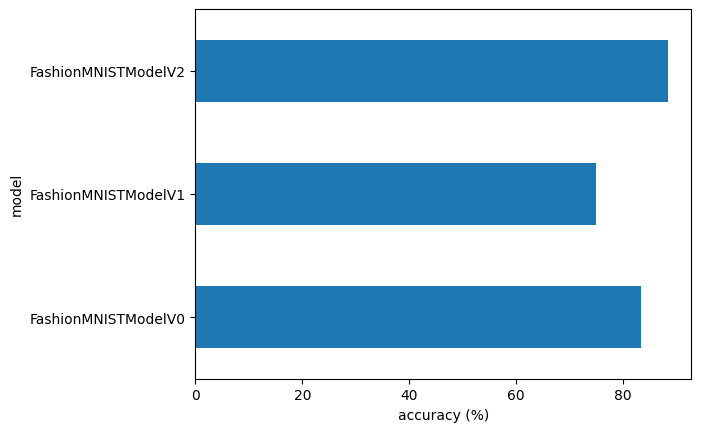

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## **3.9 Random Predictions with Best Model**

> **Make Predictions Function:**

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device) -> torch.Tensor:
    """
    Generates predictions using the provided model on the given data.

    Args:
        model (torch.nn.Module): The model used for predictions.
        data (list): A list of input data samples.
        device (torch.device, optional): The device to run predictions on. Defaults to the 'device' variable.

    Returns:
        torch.Tensor: The stacked prediction probabilities for each input sample.
    """
    pred_probs = []
    model.eval()

    # Perform inference in torch.inference_mode()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample for inference
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Get the prediction logits from the model
            pred_logit = model(sample)

            # Apply softmax to obtain prediction probabilities
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Append the prediction probabilities to the list
            pred_probs.append(pred_prob.cpu())

    # Stack the prediction probabilities into a tensor
    return torch.stack(pred_probs)

> **Summary:**
The code defines a function **`make_predictions`** that takes a model, a list of input data samples, and an optional device. It generates predictions using the provided model on the input data. The function sets the model to evaluation mode, performs inference using **`torch.inference_mode()`**, and iterates through the input data. Each sample is prepared for inference, and the model predicts the logits. Softmax is applied to the logits to obtain prediction probabilities. The prediction probabilities are stored in a list, which is then stacked into a tensor and returned as the output.

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

> **Random Select Test Sample**

In [ ]:
import random

# random.seed(42)

test_samples = []
test_labels = []

# Randomly select 9 samples from the test_data
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# Get the shape of the first test sample
test_samples[0].shape

torch.Size([1, 28, 28])

> **Summary**: The code sets the random seed to 42 using **`random.seed(42)`**. It then initializes two empty lists, **`test_samples`** and **`test_labels`**, which will be used to store the randomly selected samples and their corresponding labels. The code then uses **`random.sample()`** to randomly select 9 samples with their labels from the **`test_data`** list. Each sample and its label are appended to the respective lists. Finally, the shape of the first test sample in **`test_samples`** is accessed using **`test_samples[0].shape`**

> **Display Test Sample**

Text(0.5, 1.0, 'Ankle boot')

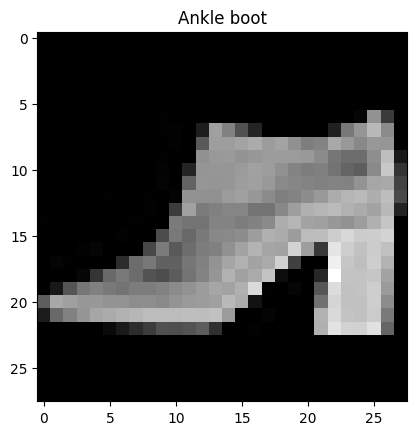

In [ ]:
# Display the image of the first test sample
plt.imshow(test_samples[0].squeeze(), cmap="gray")

# Set the title of the plot to the corresponding class name
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[2.2092e-06, 9.4241e-07, 1.2819e-06, 1.8397e-06, 7.1621e-07, 1.1493e-02,
         4.1815e-06, 1.1707e-04, 2.0793e-04, 9.8817e-01],
        [1.8789e-05, 2.1344e-05, 7.1552e-04, 1.4263e-06, 9.8827e-01, 3.9398e-07,
         1.0866e-02, 1.2759e-07, 1.0216e-04, 2.4410e-06]])

> **Summary:** The code uses **`matplotlib.pyplot`** to display the image of the first test sample. It uses **`plt.imshow()`** to visualize the image, with **`squeeze()`** used to remove any extra dimensions. The **`cmap`** parameter is set to "gray" to display the image in grayscale. The code then sets the title of the plot to the corresponding class name based on **`test_labels[0]`** and the **`class_names`** list.

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 4, 6, 9, 7, 0, 4, 0, 5])

In [ ]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([9, 4, 2, 9, 7, 6, 4, 0, 5], tensor([9, 4, 6, 9, 7, 0, 4, 0, 5]))

> **Plot Predictions**

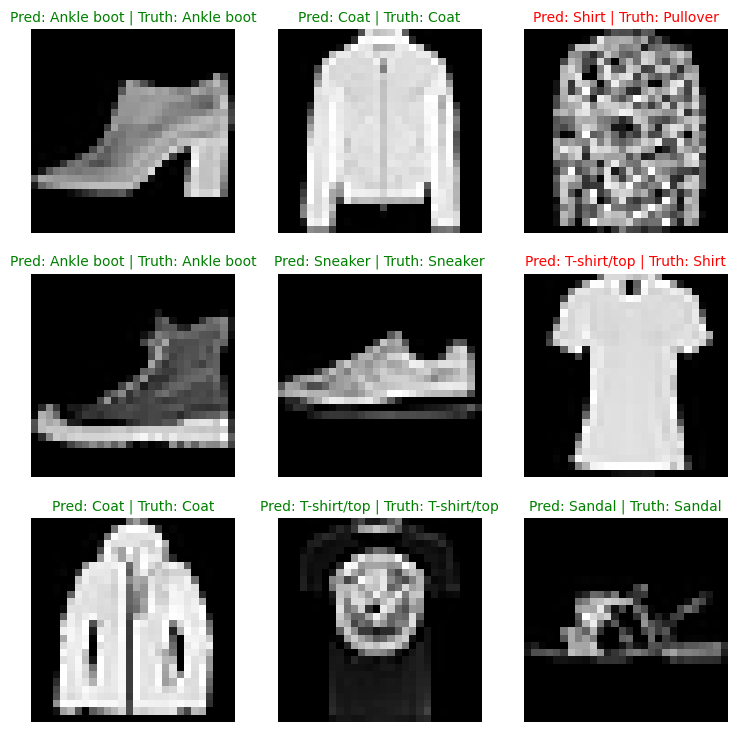

In [ ]:
# Create a figure with a grid of subplots
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

# Iterate over the test samples and their corresponding labels
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")

    # Get the predicted and true labels for the current sample
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    # Set the title text based on the predicted and true labels
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Set the color of the title based on the correctness of the prediction
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    
    # Hide axes
    plt.axis(False);

> **Summary:** The code uses **`matplotlib.pyplot`** to create a figure with a grid of subplots. It iterates over the test samples and their corresponding labels, displaying each sample as an image in a subplot using **`plt.imshow()`**. The predicted label (**`pred_label`**) and true label (**`truth_label`**) for each sample are retrieved from the **`pred_classes`** and **`test_labels`** lists, respectively. The title of each subplot is set based on the predicted and true labels. If the prediction is correct, the title is displayed in green; otherwise, it is displayed in red. The figure displays a grid of 3x3 subplots, representing a total of 9 test samples.

## **3.10 Confusion Matrix**

A **confusion matrix** is a statistical tool used to visualize and understand the performance of a classification model by comparing the model's predictions against actual values. It consists of four values: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN), which denote respectively correct positive predictions, correct negative predictions, incorrect positive predictions, and incorrect negative predictions. This matrix forms the basis for various important performance metrics like precision, recall, and F1 score. In multi-class scenarios, the matrix is extended to include all classes, enhancing its ability to reveal misclassifications between specific classes.

> **Steps we will take:**
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix using: [**`torchmetrics.ConfusionMatrix`**](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html)
3. Plot the confusion matrix using: [**`mlxtend.plotting.plot_confusion_matrix()`**](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)

> **1. Make predictions with our trained model on the test dataset**

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

# Perform inference using tqdm for progress tracking
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu)

# Concatenate the prediction tensors into a single tensor
y_pred_tensor = torch.cat(y_preds)

# Display the first 10 predictions
y_pred_tensor[:10]


> **Summary:**  The code uses **`tqdm.auto`** to track the progress of making predictions on the test dataset. It initializes an empty list **`y_preds`** to store the predicted labels. The model is set to evaluation mode using **`model_2.eval()`**. The code then performs inference using **`torch.inference_mode()`** and iterates through the test data. For each batch of input (**`X`**) and target (**`y`**), the model predicts the logits (**`y_logit`**), applies softmax to obtain prediction probabilities, and selects the class with the highest probability as the predicted label (**`y_pred`**). The predicted labels are stored in the **`y_preds`** list. After all predictions are made, the individual prediction tensors are concatenated into a single tensor using **`torch.cat()`**, resulting in **`y_pred_tensor`**. Finally, the code displays the first 10 predictions using **`y_pred_tensor[:10]`**.

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__


'0.14.0'